In [423]:
import pandas as pd
from IPython.display import Image
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pi = np.pi

# Scaling of coherent signal using excel spreadsheet

Experiment to see if we can incorporate a simple excel spreadsheet to atomatically scale power in python notebook. <br>
Why:
* Keep losses estimates in a document type that is easy to interact with (excel).
* Mantains powerful scripting and plotting capabilities of python notebook
* And permits documentation with Jupyter: Markdown, equations, external images, etc. 


### First part: Loading data from excel

This cell calls a pandas function which reads the excel file containing optical losses in the coherent link.

In [424]:
losses_df = pd.read_excel('data/Self_homodyne_link_loss_sketch.xlsx',\
                          sheet_name='Sheet1',index_col=0,header=14)

Then, we want to remove all rows that are filled entirely by nans. And transpose because here is better to have it vertical. In Excel it was convenient to have the losses horizontally because they matched the drawings. 

In [425]:
df = losses_df[losses_df.index.notnull()]
df = df.T
df = df.drop(df.index[13])

### Display data

In [426]:
s = df.style.format("{:.1f}") # Make numbers easier to read
s

,S Pav,LO Pav,Penalty,S aggr Penalty,LO aggr Penalty
Laser,16.0,nan,nan,nan,nan
Attach,11.0,11.0,-5.0,nan,nan
Splitter S,nan,9.2,-1.8,nan,nan
Splitter,6.2,nan,-4.8,-9.8,-6.8
DP IQM,2.2,nan,-4.0,-13.8,nan
CWDM Tx,1.2,8.2,-1.0,-14.8,-7.8
Tx Vgroove,-0.8,6.2,-2.0,-16.8,-9.8
Channel,-2.8,4.2,-2.0,-18.8,-11.8
Rx Vgroove,-4.8,2.2,-2.0,-20.8,-13.8
CWDM Rx,-5.8,1.2,-1.0,-21.8,-14.8


![](img/link_laser_forward.png "Laser forwarding scheme")

Index(['S Pav', 'LO Pav', 'Penalty', 'S aggr Penalty', 'LO aggr Penalty'], dtype='object')

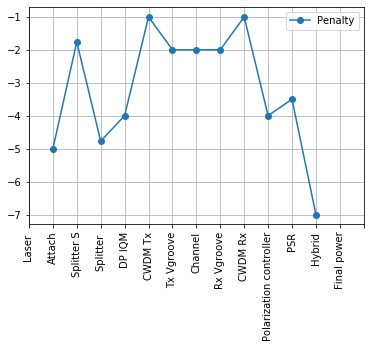

In [427]:
df.plot(y = 2,marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns

Index(['S Pav', 'LO Pav', 'Penalty', 'S aggr Penalty', 'LO aggr Penalty'], dtype='object')

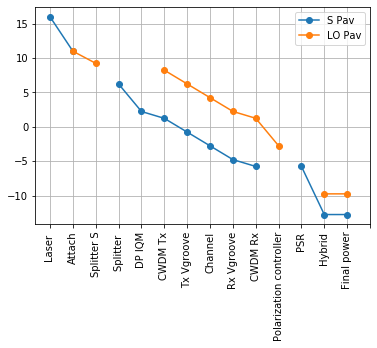

In [428]:
df.plot(y = [0,1],marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns

Index(['S Pav', 'LO Pav', 'Penalty', 'S aggr Penalty', 'LO aggr Penalty'], dtype='object')

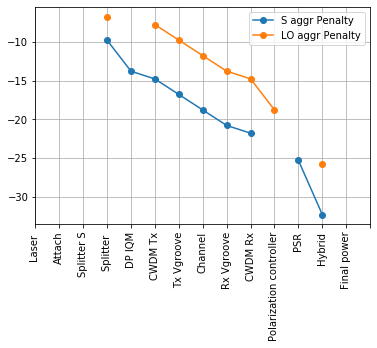

In [429]:
df.plot(y = [3,4],marker='o')
plt.xticks(range(len(df.index)+1),df.index,rotation='vertical')
plt.grid()
df.columns

## Scaling of swing 

Use the power loss or attenuation to scale constellations

#### Definition of phases in MZM
This case uses 16 QAM with equal spacing in amplitude.

In [430]:
denom       = 3
dPhi        = pi/3 # Differential phase modulation in one MZM
delta_phi_I = np.array([1,-1, -1,1,1/denom,-1/denom,-1/denom,1/denom,1/denom,-1/denom,-1,-1,-1/denom,1/denom,1,1])*dPhi/2
delta_phi_Q = np.array([1, 1,-1,-1,1/denom,1/denom,-1/denom,-1/denom,1,1,1/denom,-1/denom,-1,-1,-1/denom,1/denom])*dPhi/2

#### Plot of transmission functions of field and power

Text(0, 0.5, "Scaling of $E_0$ on 'I' axis")

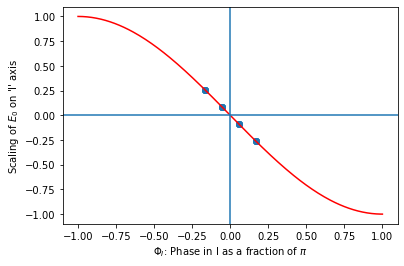

In [431]:
%matplotlib inline
#%matplotlib qt
N  = 200;
N2 = N/4;
lineWidth = 1;

x = np.linspace(0,2*pi,N)
y = np.cos(x/2)
f = plt.figure(1)
ax = plt.gca(); 
h = ax.plot(x/pi-1,y,'-r');
#'LineWidth',lineWidth,'MarkerFaceColor','red','MarkerSize',15
plt.axhline(0, 0, 1, label='horizontal line')
plt.axvline(0, 0, 1, label='horizontal line')
plt.scatter((delta_phi_I+pi)/pi-1,np.cos(delta_phi_I/2+pi/2))
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $E_0$ on 'I' axis")

Text(0, 0.5, "Scaling of $P_0$ on 'I' axis")

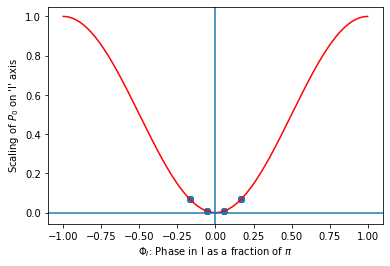

In [456]:
x2 = np.linspace(0,2*pi,N)
y2 = np.cos(x2/2)**2
f2 = plt.figure(2)
ax2 = plt.gca()
h2 = ax2.plot(x2/(pi)-1,y2,'-r')
lfsh_pout = np.cos(delta_phi_I/2+pi/2)**2
plt.axhline(0, 0, 1, label='Horizontal line')
plt.axvline(0, 0, 1, label='Vertical line')
plt.scatter((delta_phi_I+pi)/pi-1,lfsh_pout)
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $P_0$ on 'I' axis")

#### Scaling of field at balanced detector

In [454]:
signal_power_dBm = df.loc["Final power","S Pav"]
signal_power_mW = 10**(signal_power_dBm/10)

lo_power_dBm = df.loc["Final power","LO Pav"]
lo_power_mW = 10**(lo_power_dBm/10)
lo_power_mW


0.10565954616407419

In [458]:
sqrt_p_lfsh = np.sqrt(lfsh_pout*signal_power_mW*lo_power_mW)

array([0.01933704, 0.01933704, 0.01933704, 0.01933704])

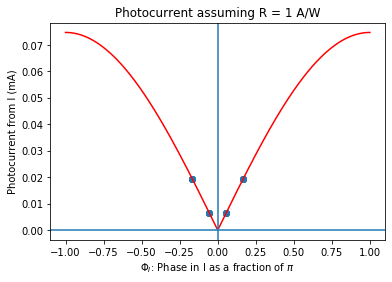

In [470]:
x2 = np.linspace(0,2*pi,N)
y2 = np.sqrt(lo_power_mW*signal_power_mW*np.cos(x2/2)**2)
f2 = plt.figure(2)
ax2 = plt.gca()
h2 = ax2.plot(x2/(pi)-1,y2,'-r')
plt.axhline(0, 0, 1, label='Horizontal line')
plt.axvline(0, 0, 1, label='Vertical line')
plt.scatter((delta_phi_I+pi)/pi-1,sqrt_p_lfsh)
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Photocurrent from I (mA)")
plt.title("Photocurrent assuming R = 1 A/W")
sqrt_p_lfsh[0:4]

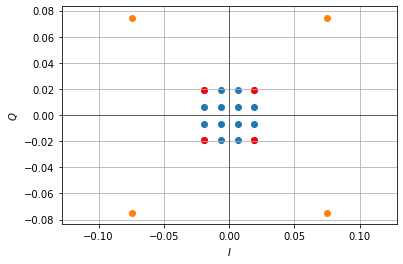

In [475]:
%matplotlib inline
E_0 = 1
alpha = np.sqrt(signal_power_mW*lo_power_mW)
L  = 1
E = alpha*(np.cos(delta_phi_I/2+pi/2) + 1j*np.cos(delta_phi_Q/2+pi/2))
fig_quadrature = plt.figure()
ax_quadrature = plt.gca()
h_quadrature = ax_quadrature.scatter(np.real(E),np.imag(E))
h_quadrature = ax_quadrature.scatter(np.real(E[0:4]),np.imag(E[0:4]),c='red')
ax_quadrature.scatter(alpha*np.array([1,-1,-1,1]),alpha*np.array([1,1,-1,-1]))
plt.axis('equal')
plt.xlabel("$I$")
plt.ylabel("$Q$")
plt.axhline(0, 0, 1, label='Horizontal line',c='black',linewidth=.5)
plt.axvline(0, 0, 1, label='Vertical line',c='black',linewidth=.5)
plt.grid()
#for i, txt in enumerate(range(len(E))):
#    ax_quadrature.annotate(txt, (np.real(E[i])+0.005, np.imag(E[i])))

### IM/DD case

Text(0, 0.5, "Scaling of $P_0$ on 'I' axis")

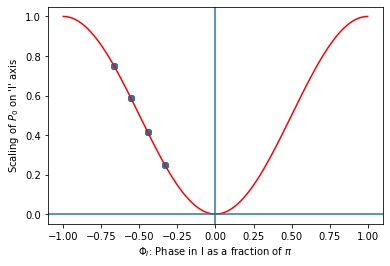

In [484]:
x2 = np.linspace(0,2*pi,N)
y2 = np.cos(x2/2)**2
f2 = plt.figure(2)
ax2 = plt.gca()
h2 = ax2.plot(x2/(pi)-1,y2,'-r')
imDd_Pout = np.cos(delta_phi_I/2+pi/4)**2
plt.axhline(0, 0, 1, label='Horizontal line')
plt.axvline(0, 0, 1, label='Vertical line')
plt.scatter((delta_phi_I+pi/2)/pi-1,imDd_Pout)
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $P_0$ on 'I' axis")

In [485]:
(imDd_Pout[1]-imDd_Pout[0])

0.4999999999999998

In [492]:
imDd_signal_power_dBm =df.loc["PSR","S Pav"]
imDd_signal_power_mW= 10**(imDd_signal_power_dBm/10)
imDd_signal_power_mW 

0.2647760782414271

Text(0, 0.5, 'Photocurrent (mA)')

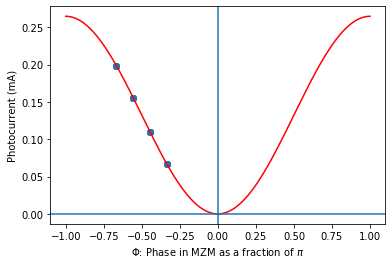

In [487]:
x2 = np.linspace(0,2*pi,N)
y2 = imDd_signal_power_mW*np.cos(x2/2)**2
f2 = plt.figure(2)
ax2 = plt.gca()
h2 = ax2.plot(x2/(pi)-1,y2,'-r')
imDd_Pout_scaled = imDd_signal_power_mW*np.cos(delta_phi_I/2+pi/4)**2
plt.axhline(0, 0, 1, label='Horizontal line')
plt.axvline(0, 0, 1, label='Vertical line')
plt.scatter((delta_phi_I+pi/2)/pi-1,imDd_Pout_scaled)
plt.xlabel("$\Phi$: Phase in MZM as a fraction of $\pi$")
plt.ylabel("Photocurrent (mA)")

In [491]:
OMA  = (imDd_Pout_scaled[1]-imDd_Pout_scaled[0])
OMA

0.1323880391207135

Challenging OMA figure vs around 20 uA for the NRZ-like detector in the coherent case. 

In [498]:
10*np.log10(30/2.5)

10.79181246047625